# Assignment

## 复习上课内容

## 　回答以下理论问题

### 请写一下TF-IDF的计算公式

#### TF计算公式

In [ ]:
词频 (term frequency, TF) 指的是某一个给定的词语在该文件中出现的次数。


$$ TFw = \frac{在某一类词条w出现的次数}{该类中所有词条数目} $$

#### IDF 计算公式

逆向文件频率 (inverse document frequency, IDF) IDF的主要思想是：如果包含词条t的文档越少, IDF越大，则说明词条具有很好的类别区分能力。某一特定词语的IDF，可以由总文件数目除以包含该词语之文件的数目，再将得到的商取对数得到。

某一特定文件内的高词语频率，以及该词语在整个文件集合中的低文件频率，可以产生出高权重的TF-IDF。因此，TF-IDF倾向于过滤掉常见的词语，保留重要的词语。

$$ IDF = log\frac{语料库的文档数}{包含词条w的文档是数+1}，分母加1是为了避免分母为0 $$

#### TF-IDF计算公式

TF-IDF值越大，则这个词成为一个关键词的概率就越大。

$$TF-IDF=TF∗IDF$$

#### TF-IDF算法的不足

1.选择的参照语料有关，语料不同，IF-IDF的值不同。需要选取质量较高且和所处理文本相符的语料库进行训练。
2.该算法是一种试图抑制噪声的加权，倾向于文本中频率小的词，这使得TF-IDF算法的精度不高。
3.不能反应词的位置信息。例如文本的标题、文本的首句和尾句等含有较重要的信息，应该赋予较高的权重。
4.对于文档中出现次数较少的重要人名、地名信息提取效果不佳

In [ ]:
#### 相关函数

def cut(string):
    return list(jieba.cut(string))

def tf(word,sentence_cut):
    return sentence_cut.count(word)

def idf(word):
    eps = 1e-6
    
    return 1/(np.log10(sum(1 for s in sentences if word in s)) +eps)

def tfidf(word, sentence):
    return tf(word, sentence) * idf(word)

def get_tfidf_from_sentence(sentence_cut):
    '''
    return : a dictionary
    '''
    
    tf_idf_words = dict()
    
    for c in set(sentence_cut):
        tf_idf_words[c] = tfidf(c, sentence_cut)
        
    return tf_idf_words
    

### LDA算法的基本假设是什么

In [ ]:
Assumptions
1.Per-document topic distributions: The topics of each document obey a probaility distribution.每个文档的主题符合一定的分布.
2.Per-topic word distributions: The words of each topic obey a probability distribution.每个文档的词符合一定的分布.
引入了先验知识，

### 在TextRank算法中构建图的权重如何得到的？

Googel发明了“Pagerank”的网页排名算法

Pagerank的核心思想：如果一个网页被很多其他网页所链接，说明它受到普遍的承认和信赖，那么它的排名就高。

网页的影响力=所有入链集和的页面的加权影响力之和。

Pagerank的算法(略)

TextRank在构建图的时候将节点由网页改成了句子，并未节点之间的边引入了权值，其中权值表示两个句子的相似度，本质上构建了一个带权无向图。
在TextRank构建的图中，默认节点就是句子，权重Wij为两个句子Si和Sj的相似度分数。可通过词向量，计算词语词向量计算相似度。

**TextRank**的主要思想：一个词的重要性由其他与其关联的词决定。
算法流程：
（1）确定文本的最佳代表形式：词已或者单个字或其他，并将其作为图中的节点；
（2）构建节点之间的边，例如共现信息当做权重；
（3）迭代，直到算法收敛；
（4）将节点按照分数排序，得到关键词。

参考：
https://www.cnblogs.com/qiaoyanlin/p/6891445.html

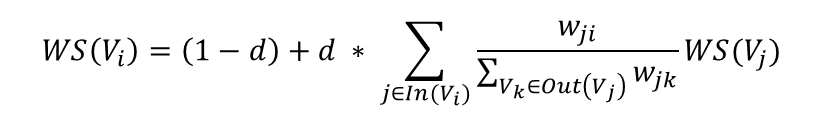

G（V，E）代表文本中由词语构成的有向图，V为词语节点集合，E为边的集合。对于一个节点Vi,In(Vi)代表指向Vi的节点集合，Out(Vj)代表Vj指向的节点集合。Wji、Wjk是两点之间的权重；WS（Vi）是Vi节点权重；d是阻尼系数，一般为0.85，其意义是当前节点想其他任意节点跳转的概率，同时能够让权重稳定的传递至收敛。

步骤：

1）将当前文本进行整句分割，得到 T=[S1,S2,……Sn];

2）对于Si∈T，进行分词、词性标注、停用词过滤，必要时可添加特定停用词词典，最后得到Si=[di1,di2,……din],din∈Si为处理后的候选关键词；

3）构建关键词图G=（V,E），其中V为候选关键词节点集合，E为候选关键词之间的边集合，边的有无由候选关键词的共现关系决定，共现则有，否则无；

4）根据上面的公式，迭代传播候选关键词节点Vi的权重，直至收敛；

5）得到所有候选关键词节点Vi的权重，进行降序排列，得到top K个词作为最终关键词

参考文献：
[1]周锦章,崔晓晖.基于词向量与TextRank的关键词提取方法[J].计算机应用研究,2019,36(04):1051-1054

### 什么是命名实体识别？有什么应用场景？

定义：命名实体识别（Named Entity Recognition,简称NER）,是指识别文本中具有特定意义的实体，主要包括人名、地名、机构名、专有名词等。简单的讲，就是识别自然文本中的实体指称的边界和类别。

应用场景：信息提取、问答系统、句法分析、机器翻译

参考
https://blog.csdn.net/guleileo/article/details/88968909

### NLP主要有哪几类任务 ？

序列标注：分词，词性标注，命名实体识别;

分类任务：文本分类，情感分析；

句子关系判断：entailment（分类为蕴含或矛盾），相似度计算；

生成式任务：机器翻译，问答系统，文本摘要

In [3]:
import gensim
import pandas as pd
import jieba
import re
import stanfordcorenlp
import math
import numpy as np
import random

In [ ]:
## Data Preprocessing

In [6]:
data_source = '../data/sqlResult_1558435.csv'

In [7]:
data = pd.read_csv(data_source,encoding='gb18030')

In [8]:
data = data.fillna('')

In [10]:
def cut(string): return ' '.join(jieba.cut(string))

In [11]:
cut('南京市长江大桥')

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Geoffrey\AppData\Local\Temp\jieba.cache
Loading model cost 2.863 seconds.
Prefix dict has been built succesfully.


'南京市 长江大桥'

In [12]:
content = data['content'].tolist()

In [15]:
def token(string):
    return re.findall(r'[\d|\w]+',string)

In [16]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [17]:
news_content = [token(n) for n in content]

In [18]:
news_content = [''.join(n) for n in news_content]

In [19]:
news_content = [cut(n) for n in news_content]  #耗时

In [ ]:
news_content

In [ ]:
## TF-IDF

In [20]:
def document_frequency(word):
    return sum(1 for n in news_content if word in n) #??

In [21]:
def idf(word):
    return math.log10(len(news_content))/document_frequency(word)

In [22]:
idf('的')

7.040404486355909e-05

In [23]:
idf('小米')  

0.049523613237924737

In [24]:
def tf(word,document):
    words = document.split()
    return sum(1 for w in words if w==word)

In [25]:
tf("的",news_content[0])

2

In [26]:
def tf_idf(word,document):
    return tf(word,document)*idf(word)

In [27]:
tf_idf('的',news_content[0])

0.00014080808972711818

In [28]:
def get_keywords_of_a_document(document):
    words = set(document.split())
    tfidf = [
        (w,tf_idf(w,document)) for w in words
    ]
    tfidf = sorted(tfidf, key=lambda x:ｘ[1], reverse = True)
    return tfidf

In [29]:
get_keywords_of_a_document(news_content[1])

[('二合一', 4.9523613237924735),
 ('CPUGPU', 4.9523613237924735),
 ('biglittle', 4.9523613237924735),
 ('835Win10', 4.9523613237924735),
 ('Wintel', 2.4761806618962368),
 ('屏蔽掉', 2.4761806618962368),
 ('源码', 2.4761806618962368),
 ('Windows10', 1.8571354964221776),
 ('基带', 1.6507871079308245),
 ('SoC', 1.6507871079308245),
 ('Exynos', 1.2380903309481184),
 ('骁龙', 0.8253935539654123),
 ('Q4', 0.8253935539654123),
 ('联发科', 0.7074801891132105),
 ('ARM', 0.6190451654740592),
 ('PCB', 0.5502623693102748),
 ('华硕', 0.49523613237924735),
 ('功耗', 0.2358267297044035),
 ('惠普', 0.2251073328996579),
 ('蓝牙', 0.20634838849135306),
 ('高通', 0.17376706399271838),
 ('835', 0.16787665504381266),
 ('麒麟', 0.1547612913685148),
 ('桌面', 0.1291920345337167),
 ('WiFi', 0.12380903309481184),
 ('处理器', 0.10536938986792496),
 ('微软', 0.05412416747314179),
 ('小米', 0.049523613237924737),
 ('联想', 0.04543450755772911),
 ('按计划', 0.027361112286146263),
 ('性能', 0.026412593726893193),
 ('架构', 0.026065059598907755),
 ('澎湃', 0.025

In [30]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows10 桌面 平台 认证 的 ARM 处理器 高通 强调 不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心 相反 他们 正 联手 微软 找到 一种 适合 桌面 平台 的 兼顾 性能 和 功耗 的 完美 方案 报道 称 微软 已经 拿到 了 一些 新 的 源码 以便 Windows10 更好 地 理解 biglittle 架构 资料 显示 骁龙 835 作为 一款 集成 了 CPUGPU 基带 蓝牙 WiFi 的 SoC 比 传统 的 Wintel 方案 可以 节省 至少 30 的 PCB 空间 按计划 今年 Q4 华硕 惠普 联想 将 首发 骁龙 835Win10 电脑 预计 均 是 二合一 形态 的 产品 当然 高通 骁龙 只是 个 开始 未来 也许 还 能 见到 三星 Exynos 联发科 华为 麒麟 小米 澎湃 等 进入 Windows10 桌面 平台'

In [ ]:
## TFIDF Vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vectorizer = TfidfVectorizer(max_features = 10000)

In [34]:
sample_num = 50000
sub_samples = news_content [:sample_num]

In [35]:
X = vectorizer.fit_transform(sub_samples)  #fit_transform建立tfidf

In [36]:
len(vectorizer.vocabulary_)  #保留特征最大的前10000个词

10000

In [37]:
np.where(X[1].toarray())  # find position whose values is not zero

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([ 100,  281,  360,  372,  472,  578, 1008, 1162, 1244, 1269, 1285,
        1380, 1462, 1886, 2435, 2754, 2760, 2989, 3067, 3353, 3800, 3990,
        4173, 4272, 4429, 4497, 4521, 4529, 4595, 4658, 4961, 5037, 5104,
        5136, 5550, 5717, 5771, 5899, 6035, 6081, 6710, 6971, 7072, 7217,
        7506, 7986, 8025, 8026, 8137, 8207, 8479, 8558, 8799, 9127, 9196,
        9252, 9637, 9744, 9824], dtype=int64))

In [39]:
X[1].toarray()[0][12]

0.0

In [40]:
document_1,document_2 = random.randint(0,1000),random.randint(0,1000)

In [41]:
document_1

422

In [42]:
document_2

594

In [43]:
news_content[document_1]

'以前 浮现 闭门 打磨 的 珠海 黄 木匠 但 现在 是 格力 出货量 不大 但 自 研且 自建产线 更 关键 是 2016 大家 发 高通 820 旗舰 格力 发 820 的 格力 2 代 2017 大家 发 高通 835 旗舰 格力 继续 打磨 820 格力 色界 2018 年 高通 845 都 有 了 格力 还有 820 新机 这才 是 不闻 窗外事 专心 打磨 的 工匠 精神 由此 看出 格力 手机 在 明年 还 将 会 推出 骁龙 820 手机 彼时 高通 骁龙 845 已经 上市 格力 依然 还 在 用 去年 的 芯片 骁龙 820 虽然 骁龙 820 芯片 性能 并 不 落伍 但 格力 手机 如果 不能 在 其它 方面 做出 差异化 的话 很难 吸引 用户 买单 从 业内人士 潘 九堂 的 微博中 我们 还 能 看到 格力 手机 正在 专注 打磨 骁龙 820 新机 国产手机 行业 又 将 迎来 一位 工匠 人物 董明珠 倘若 格力 再出 骁龙 820 手机 你 会 考虑 购买 吗'

In [44]:
vector_of_document_1 = X[document_1].toarray()[0]

In [45]:
news_content[document_2]

'点击 图片 进入 下 一页 贫困人口 大多 文化 水平 低 年龄 大 缺乏 技能 单打独斗 力量 有限 山西省 联社 党委书记 理事长 崔 联会 称 希望 他们 可以 借助 集体 的 力量 激发 创业 激情 尤其 是 思想 要 改变 范丽芳 摄 中新网 吕梁 6 月 23 日电 范丽芳 养羊 种瓜 修路 扶持 电商 成立 合作社 自 2017 年初 山西省 农村 信用社 联合社 以下 简称 山西省 联社 扶贫 队 进驻 山西 吕梁 临县 后 多种形式 的 扶贫 举措 次第 展开 新鲜 元素 的 注入 正在 让 村民 的 思想 发生 改变 吕梁山区 是 中国 14 个 连片 特困 地区 之一 而 临县 是 山西 最大 的 贫困县 一直 以来 这个 国家级 贫困县 因 土地 贫瘠 地少 人 多 年轻人 外出 产业 单一 等 问题 而 享受 特殊 待遇 长此以往 面对 贫困 村民 习惯 了 等 靠 要 点击 图片 进入 下 一页 芦则 沟 位于 临县 西北 方向 的 白文 镇距 县城 25 公里 全村 不足 700 人 主要 收入 靠 外出 打工 农作物 收入 和 零星 养殖业 47 岁 的 刘谈青 一家 三口 年收入 3173 元属 贫困户 儿子 正在 上 小学 家里 养羊 为生 他 最大 的 问题 是 羊 没有 销路 临县 白文 镇 农村 信用社 工作人员 唐永强 对 刘家 的 情况 了如指掌'

In [46]:
vector_of_document_2 = X[document_2].toarray()[0]

In [47]:
from scipy.spatial.distance import cosine

In [48]:
def distance(v1,v2):return cosine(v1,v2)  #计算两个文本的相似度

In [49]:
distance(vector_of_document_1,vector_of_document_2)

0.9957284126269743

In [ ]:
# TextRank Homework.在上面选择一个文档做textRank
#假设没有边，无向的pagerank


In [ ]:
## LDA

In [50]:
from gensim import corpora, models
import jieba.posseg as jp, jieba

In [ ]:
news = news_content[:100]

In [52]:
flags = ('n','nr','ns','nt','eng','v','d')

In [53]:
data = pd.read_csv(data_source,encoding='gb18030')

In [56]:
news = data["content"][:100]

In [54]:
stop_words = []
with open('./百度停用词表.txt',encoding='utf-8') as f:
    for word in f.readlines():
        stop_words.append(word.strip())

In [57]:
words_ls = []
for text in news:
    words = [w.word for w in jp.cut(text) if w.flag in flags and w.word not in stop_words]
    words_ls.append(words)

In [63]:
dictionary = corpora.Dictionary(words_ls)

In [64]:
corpus = [dictionary.doc2bow(words) for words in words_ls] #转换lda所需要的数据格式

In [65]:
lda = models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=5)  #num_topics=5为超参，可调

In [66]:
for topic in lda.print_topics(num_words=10):  #前10的词
    print(topic)

(0, '0.005*"都" + 0.005*"企业" + 0.004*"跨境" + 0.004*"相关" + 0.003*"人" + 0.003*"内容" + 0.003*"不" + 0.003*"会" + 0.003*"市场" + 0.003*"说"')
(1, '0.007*"市场" + 0.005*"不" + 0.004*"都" + 0.004*"企业" + 0.004*"还" + 0.004*"内容" + 0.003*"人" + 0.003*"中国" + 0.003*"电影" + 0.003*"跨境"')
(2, '0.006*"会" + 0.005*"都" + 0.005*"配送" + 0.005*"不" + 0.004*"市场" + 0.004*"人" + 0.004*"无人" + 0.004*"乐视" + 0.004*"还" + 0.003*"摄像头"')
(3, '0.005*"会" + 0.005*"还" + 0.005*"市场" + 0.005*"记者" + 0.005*"不" + 0.004*"中国" + 0.004*"都" + 0.004*"人" + 0.004*"挡泥板" + 0.003*"更"')
(4, '0.006*"都" + 0.006*"市场" + 0.006*"中国" + 0.005*"人" + 0.004*"会" + 0.004*"不" + 0.004*"还" + 0.003*"冰架" + 0.003*"格力" + 0.003*"手机"')


In [67]:
text = data["content"][102]  #查看102文本

In [68]:
words = [[w.word for w in jp.cut(text) if w.flag in flags and w.word not in stop_words]]

In [69]:
text_corpus = [dictionary.doc2bow(word) for word in words]

In [70]:
list(lda[text_corpus])

[[(3, 0.99154484)]]

In [71]:
text

'新疆日报讯（通讯员吕丽娜报道）6月13日，笔者在拜城县残联培训基地见到了正在参加雕刻技术培训的托乎提·斯坎达尔，今年31岁的他是拜城县托克逊乡亚吐尔村的村民。通过学习，他已经可以利用残疾的双手雕刻出漂亮的葫芦花纹，学到技术后的他还加入了农民合作社，现在每个月有2000多元的稳定收入，最高时月收入达5000多元。\r\n据悉，今年以来，拜城县为进一步做好残疾人就业援助工作，采取“兴趣+技能”“培训+技能”等方式，在该县残疾人培训基地分别举办厨师班、刺绣班、雕刻班、地毯编织班等技能培训班，给全县的残疾人提供学习技能的机会，学习期间为他们免费提供食宿。\r\n现在每个班都会吸引一些残疾人前来学习技术，技能培训班不仅能帮助残疾人掌握一门技能，还能拓宽残疾人就业渠道。家住拜城县大桥乡农民阿不都热依木·亚森说：“我现在在合作社上班，有了稳定收入，家里的变化也非常大。谢谢党和政府的好政策！”\r\n截至目前，全县已有50多名残疾人成功实现就业。\r\n免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。\r\n'

In [ ]:
#lda的缺点， 主题数量是需要自己设定。如果不知道文本有多少主题，自己猜就会不稳定，主题少词就相差很多

In [ ]:
https://www.cnblogs.com/motohq/p/11887420.html
https://blog.csdn.net/qq_41664845/article/details/82869596